# Load DEA Landsat Factional cover data with updated configuration file

This notebook demonstrates the value of using `RasterBase` along with `QueryParams` and `LoadParams` to enable loading the same data from different sources with minimal changes to code.

This notebook demonstrates how to load data for Australia from Digital Earth Australia

For more information on these classes, see [load_demo.ipynb](load_demo.ipynb).

## Set up
The following cell should be uncommented and run if you installed the package in editable mode and are actively developing and testing modules.
Otherwise, it can be left commented.

In [1]:
# %load_ext autoreload
# %autoreload 2

### Enable logging

This will allow you to see info and warning messages from the package.

In [2]:
import logging
import sys

logging.basicConfig(
    format="%(asctime)s | %(levelname)s : %(message)s",
    level=logging.INFO,
    stream=sys.stdout,
)

### Import the relevant packages

In [3]:
import numpy as np

from eo_insights.raster_base import RasterBase, QueryParams, LoadParams
from eo_insights.stac_configuration import de_australia_stac_config

In this section we load Landsat fractional cover data over Australia from DE Australia

### Set up area of interest and time to load

In [10]:
aus_query_params = QueryParams(
    bbox=(145.02, -37.46, 145.01, -37.45),
    start_date="2020-01-01",
    end_date="2021-01-01",
)

### Load and plot Fractional cover data

In [11]:
deaus_load_params = LoadParams(
    crs="EPSG:3577", resolution=30, bands=("pv_pc_50", "bs_pc_50", "npv_pc_50")
)

In [12]:
deaus_stac_raster = RasterBase.from_stac_query(
    config=de_australia_stac_config,
    collections=["ga_ls_fc_pc_cyear_3"],
    query_params=aus_query_params,
    load_params=deaus_load_params,
)

2024-09-25 16:06:28,377 | WARNING : There were no configured masks found for ga_ls_fc_pc_cyear_3
2024-09-25 16:06:28,378 | INFO : No masks were found for the requested collections


2024-09-25 16:06:28,503 | INFO : boto3 not available, falling back to a DummySession.


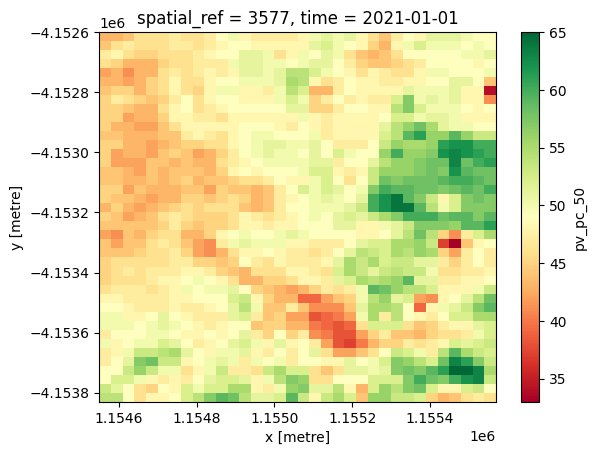

In [13]:
deaus_stac_raster.data.pv_pc_50.isel(time=1).plot(cmap="RdYlGn")

In [14]:
deaus_stac_raster.data.pv_pc_50

<xarray.DataArray 'pv_pc_50' (time: 2, y: 41, x: 34)> Size: 3kB
dask.array<pv_pc_50, shape=(2, 41, 34), dtype=uint8, chunksize=(1, 41, 34), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 328B -4.153e+06 -4.153e+06 ... -4.154e+06
  * x            (x) float64 272B 1.155e+06 1.155e+06 ... 1.156e+06 1.156e+06
    spatial_ref  int32 4B 3577
  * time         (time) datetime64[ns] 16B 2020-01-01 2021-01-01
Attributes:
    nodata:   255